# Lab 1 Samuel Bieberich

## Section 1.a

Digital filters are broadly classified into FIR and IIR filters. Give an
example of an FIR filter and IIR filter (transfer function). Plot the transfer
function in Python. Identify the poles and zeros on the plot.

In [2]:
#imports cell 

#may need to install scipy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal

In [3]:
#The FIR filter example I chose (arbitrary numbers) is as follows:



In [4]:
#plotting the filter response

In [5]:
#plotting the poles and zeros

In [6]:
#The IIR filter example I chose is as follows:

In [7]:
#plotting filter response 

In [8]:
#plotting the poles and zeroes

## Section 1.b

Identify the FIR and IIR filter. Plot the FIR filter in (use freqz function in
the SciPy signal processing toolbox). Where are the poles and zeros of the
filter located? Validate your theory using simulations.

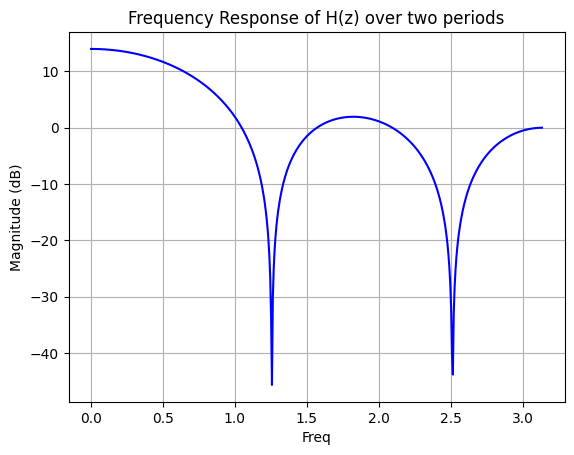

In [11]:
#modeling the FIR filter with freqz from scipy

b = [1, 1, 1, 1, 1]  #coefficients of H
a = 1 

w, H = signal.freqz(b, a)

plt.figure()
plt.title('Frequency Response of H(z) over two periods')
plt.plot(w, 20 * np.log10(abs(H)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Freq')
plt.grid(True)
plt.show()

In [ ]:
#showing the poles and zeroes